## Titanic - Machine Learning from Disaster

- Let's use the [kaggle dataset](https://www.kaggle.com/competitions/titanic)

- It is a set of competition data, evaluated by accuracy

### Data Dictionary
- `survival`: 0 = No, 1 = Yes

- `pclass`: Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

- `Age`: Age in years 	

- `sibsp`: number of siblings / spouses aboard the Titanic 	

- `parch`: number of parents / children aboard the Titanic 	

- `ticket`: Ticket number 	

- `fare`: Passenger fare 	

- `cabin`: Cabin number 	

- `embarked`: Port of Embarkatio C = Cherbourg, Q = Queenstown, S = Southampton


### Import the essential libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils.helpers as hp

sns.set_palette("pastel")
SEED = np.random.seed(9)

### Taking the data and transforming it into a dataframe

In [41]:
path = '../../data/raw/'

train = pd.read_csv(f"{path}train.csv")
test = pd.read_csv(f"{path}test.csv")

- DataFrame shape

In [42]:
train.shape

(891, 12)

In [43]:
test.shape

(418, 11)

- Just a look at the dataframe

In [44]:
train.sample(3, random_state=SEED)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S


In [45]:
test.sample(3, random_state=SEED)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
139,1031,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.90,NaN,S
257,1149,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.05,NaN,S
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.40,D28,S


### Exploratory data analysis

- Now we can start analyzing this base

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Displaying `NA values`

In [48]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [49]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

- We have `null values` in both datasets and in different 

- Therefore, we'll deal with this in the important columns

#### Train Dataset

##### Age

In [50]:
train['Age'].describe().round(1)

count    714.0
mean      29.7
std       14.5
min        0.4
25%       20.1
50%       28.0
75%       38.0
max       80.0
Name: Age, dtype: float64

- Histogram plot for better visualization

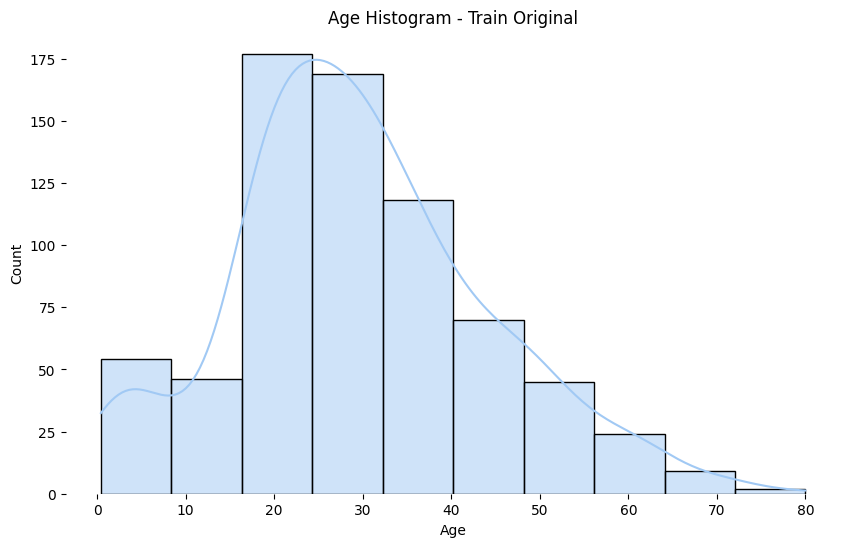

In [51]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['Age'], bins=10, kde=True, ax=ax).set(title='Age Histogram - Train Original')
sns.despine(bottom=True, left=True)
plt.show()

In [52]:
median_tr = train['Age'].median()
print(f"Median: {median_tr}")

Median: 28.0


- We will use the median to fill in the `Age` column

In [53]:
train['Age'] = train['Age'].fillna(median_tr)

- Histogram plot for better visualization (**After fillna**)

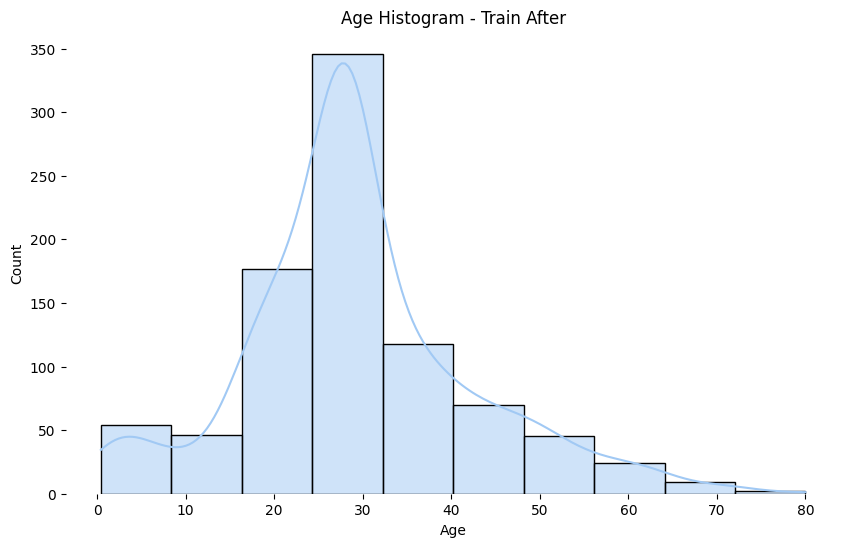

In [54]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(train['Age'], bins=10, kde=True, ax=ax).set(title='Age Histogram - Train After')
sns.despine(bottom=True, left=True)
plt.show()

##### Embaerked

In [55]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

- We will use the mode to fill in the `Embarked` column

In [56]:
mode = train['Embarked'].mode()[0]
print(f"Mode of Embarked: {mode}")

Mode of Embarked: S


In [57]:
train['Embarked'] = train['Embarked'].fillna(mode)

- Check that everything is fine

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Test Dataset

##### Age

- Same stages as the train

In [59]:
test['Age'].describe().round(1)

count    332.0
mean      30.3
std       14.2
min        0.2
25%       21.0
50%       27.0
75%       39.0
max       76.0
Name: Age, dtype: float64

- Histogram plot for better visualization

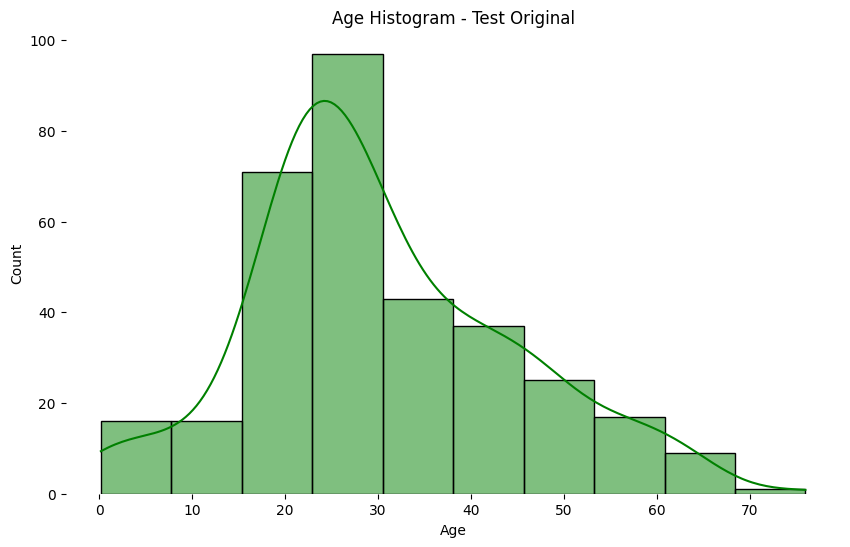

In [60]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(test['Age'], bins=10, kde=True, color='Green', ax=ax).set(title='Age Histogram - Test Original')
sns.despine(bottom=True, left=True)
plt.show()

In [61]:
median = test['Age'].median()
print(f"Median: {median}")

Median: 27.0


In [62]:
test['Age'] = test['Age'].fillna(median)

- Histogram plot for better visualization (**After fillna**)

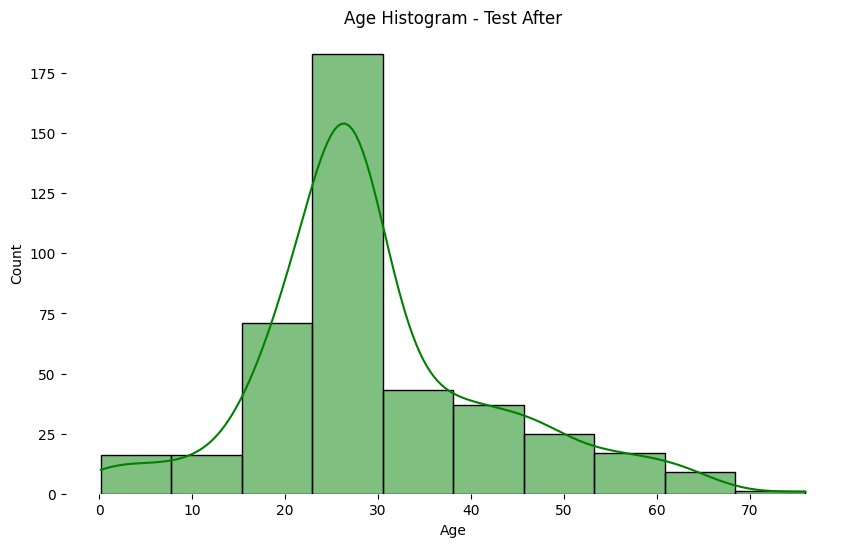

In [63]:
f, ax = plt.subplots(figsize=(10, 6))
sns.histplot(test['Age'], bins=10, kde=True, color='Green', ax=ax).set(title='Age Histogram - Test After')
sns.despine(bottom=True, left=True)
plt.show()

##### Fare

In [64]:
test['Fare'].describe().round(1)

count    417.0
mean      35.6
std       55.9
min        0.0
25%        7.9
50%       14.5
75%       31.5
max      512.3
Name: Fare, dtype: float64

- We will use the mean to fill in the `Fare` column

In [65]:
mean = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(mean)

- Check that everything is fine here too

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Checking the cardinality of the columns

In [67]:
train.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

- These columns have a high cardinality `Name`, `Ticket`, `Cabin` and cannot help us

- Then we'll delete these columns

In [68]:
drop_columns = ['Name', 'Ticket', 'Cabin']
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [69]:
train.sample(3, random_state=SEED)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
822,823,0,1,male,38.0,0,0,0.0000,S
359,360,1,3,female,28.0,0,0,7.8792,Q
435,436,1,1,female,14.0,1,2,120.0000,S


In [70]:
test.sample(3, random_state=SEED)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
272,1164,1,female,26.0,1,0,136.7792,C
24,916,1,female,48.0,1,3,262.3750,C
121,1013,3,male,27.0,1,0,7.7500,Q


#### Exploring object columns

In [71]:
train.columns[train.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [72]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [73]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### The next step is to apply feature engineering

- Let's do some basic operations in this part

In [74]:
train['IsMale'] = hp.is_male(train, 'Sex')
train[['Sex','IsMale']].value_counts()

Sex     IsMale
male    1         577
female  0         314
Name: count, dtype: int64

In [75]:
test['IsMale'] = hp.is_male(test, 'Sex')
test[['Sex','IsMale']].value_counts()

Sex     IsMale
male    1         266
female  0         152
Name: count, dtype: int64

- Now, to handle the Embarked column we'll use `OneHotEncoder`

In [76]:
train = hp.apply_one_hot_encoding(train, ['Embarked'])

In [77]:
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].value_counts()

Embarked  Embarked_S  Embarked_C  Embarked_Q
S         1           0           0             646
C         0           1           0             168
Q         0           0           1              77
Name: count, dtype: int64

In [78]:
test = hp.apply_one_hot_encoding(test, ['Embarked'])

In [79]:
test[['Embarked', 'Embarked_S', 'Embarked_Q', 'Embarked_C']].value_counts()

Embarked  Embarked_S  Embarked_Q  Embarked_C
S         1           0           0             270
C         0           0           1             102
Q         0           1           0              46
Name: count, dtype: int64

- Now we can delete the string columns

In [85]:
train = train.drop(['Sex','Embarked'],axis=1)
test = test.drop(['Sex','Embarked'],axis=1)

In [96]:
train.sample(2, random_state=SEED)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
470,471,0,3,28.0,0,0,7.250,1,0,0,1
328,329,1,3,31.0,1,1,20.525,0,0,0,1


In [94]:
test.sample(2, random_state=SEED)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
33,925,3,27.0,1,2,23.45,0,0,0,1
238,1130,2,18.0,1,1,13.00,0,0,0,1


We've finished our EDA here

### Saving the cleaned data

In [99]:
train_processed = train
test_processed = test

In [100]:
path_pro = '../../data/processed/'

train_processed.to_csv(f'{path_pro}train_processed.csv', index=False)
test_processed.to_csv(f'{path_pro}test_processed.csv', index=False)